In [27]:
import re
from collections import defaultdict
import pymorphy2
from nltk.corpus import stopwords
from pandas import read_csv, DataFrame
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.svm import SVR
import matplotlib.pyplot as plt

morph = pymorphy2.MorphAnalyzer()
stops = set(stopwords.words("english")) | set(stopwords.words("russian"))

def normalize(text):
    new_text = re.sub("[^а-яА-Яa-zA-Z]", " ", text)
    # lower case
    words = new_text.lower().split()
    # remove stop words
    words = [w for w in words if not w in stops]
    # normal form
    words = [morph.parse(w)[0].normal_form for w in words]
    return (words)


dataset = read_csv('test.tsv',sep ='\t',error_bad_lines=False)
data = DataFrame(dataset, columns=['likes','coms','favs','size','text'])


In [28]:
res_data = []
data_part_of_speach = []
for item in data['text']:
    data_part_of_speach = normalize(item)
    help = []
    for word in  data_part_of_speach:
        helper = morph.parse(word)[0]
        help.append(helper.tag.POS)
    res_data.append(help)
    

In [ ]:

#NOUN	имя существительное	хомяк
#ADJF	имя прилагательное (полное)	хороший
#ADJS	имя прилагательное (краткое)	хорош
#COMP	компаратив	лучше, получше, выше
#VERB	глагол (личная форма)	говорю, говорит, говорил
#INFN	глагол (инфинитив)	говорить, сказать
#PRTF	причастие (полное)	прочитавший, прочитанная
#PRTS	причастие (краткое)	прочитана
#GRND	деепричастие	прочитав, рассказывая
#NUMR	числительное	три, пятьдесят
#ADVB	наречие	круто
#NPRO	местоимение-существительное	он
#PRED	предикатив	некогда
#PREP	предлог	в
#CONJ	союз	и
#PRCL	частица	бы, же, лишь
#INTJ   междометие

In [45]:
data_words = DataFrame()
for item in res_data:
    NOUN=ADJF=ADJS=COMP=VERB=INFN=PRTF=PRTS=GRND=NUMR=ADVB=NPRO=PRED=PREP=CONJ=PRCL=INTJ= 0
    for word in item:        
        if word == 'NOUN':
            NOUN += 1
        if word == 'ADJF':
            ADJF += 1
        if word == 'ADJS':
            ADJS += 1
        if word == 'COMP':
            COMP += 1
        if word == 'VERB':
            VERB += 1
        if word == 'INFN':
            INFN += 1
        if word == 'PRTF':
            PRTF += 1
        if word == 'PRTS':
            PRTS += 1
        if word == 'GRND':
            GRND += 1
        if word == 'NUMR':
            NUMR += 1
        if word == 'ADVB':
            ADVB += 1
        if word == 'NPRO':
            NPRO += 1
        if word == 'PRED':
            PRED += 1
        if word == 'PREP':
            PREP += 1
        if word == 'CONJ':
            CONJ += 1
        if word == 'PRCL':
            PRCL += 1
        if word == 'INTJ':
            INTJ += 1
    #result = {'NOUN':NOUN,'ADJF':ADJF,"ADJS":ADJS,"COMP":COMP,"VERB":VERB,"INFN":INFN,"PRTF":PRTF,"PRTS":PRTS,"GRND":GRND,"NUMR":NUMR,"ADVB":ADVB,"NPRO":NPRO,"PRED":PRED,"PREP":PREP,"CONJ":CONJ,"PRCL":PRCL,"INTJ":INTJ}
    result = {'NOUN':NOUN/len(item)*100,'ADJF':ADJF/len(item)*100,"ADJS":ADJS/len(item)*100,"COMP":COMP/len(item)*100,"VERB":VERB/len(item)*100,"INFN":INFN/len(item)*100,"PRTF":PRTF/len(item)*100,"PRTS":PRTS/len(item)*100,"GRND":GRND/len(item)*100,"NUMR":NUMR/len(item)*100,"ADVB":ADVB/len(item)*100,"NPRO":NPRO/len(item)*100,"PRED":PRED/len(item)*100,"PREP":PREP/len(item)*100,"CONJ":CONJ/len(item)*100,"PRCL":PRCL/len(item)*100,"INTJ":INTJ/len(item)*100}
    data_words = data_words.append(result,ignore_index=True)
data_words = data_words.join(data['likes'])

           ADJF      ADJS      ADVB      COMP      CONJ      GRND      INFN  \
ADJF   1.000000  0.002041  0.172280 -0.005746 -0.031209  0.014694  0.027207   
ADJS   0.002041  1.000000  0.009530 -0.005462 -0.000764  0.004254 -0.038380   
ADVB   0.172280  0.009530  1.000000  0.014440  0.075024  0.030972  0.313530   
COMP  -0.005746 -0.005462  0.014440  1.000000 -0.006412 -0.003383  0.005005   
CONJ  -0.031209 -0.000764  0.075024 -0.006412  1.000000  0.024233  0.038019   
GRND   0.014694  0.004254  0.030972 -0.003383  0.024233  1.000000  0.015654   
INFN   0.027207 -0.038380  0.313530  0.005005  0.038019  0.015654  1.000000   
INTJ   0.034982 -0.009591  0.004366  0.000355  0.004808 -0.023165  0.007047   
NOUN  -0.117639  0.042228 -0.270274 -0.000737 -0.168587 -0.007255 -0.248499   
NPRO   0.117754  0.006675  0.243310  0.009973 -0.002517  0.057690  0.269679   
NUMR  -0.074867  0.003817 -0.101151 -0.007324 -0.059247 -0.014887 -0.153982   
PRCL   0.202408  0.000413  0.390324  0.001036  0.032

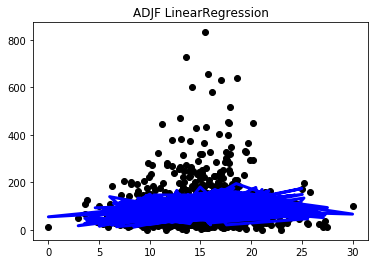

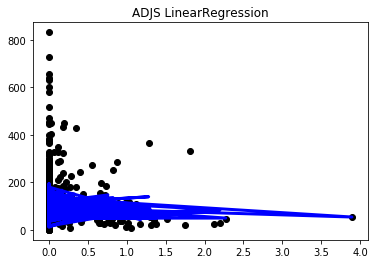

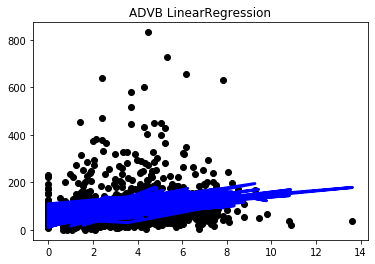

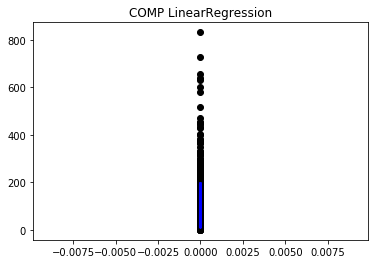

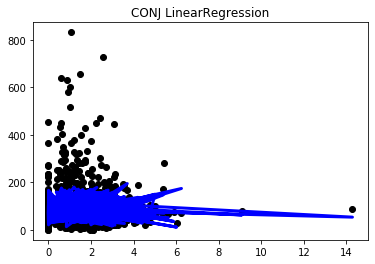

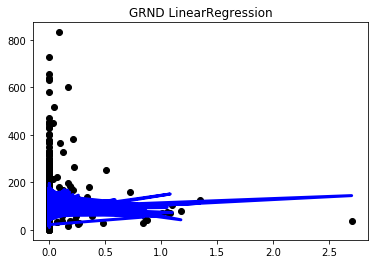

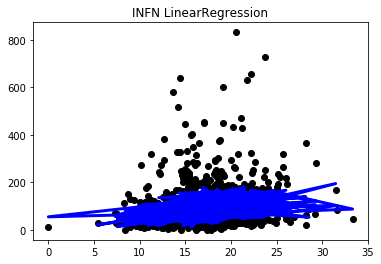

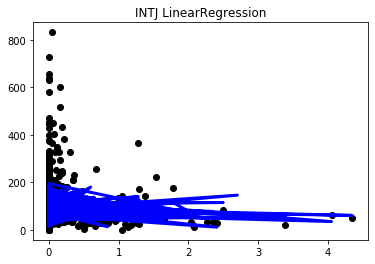

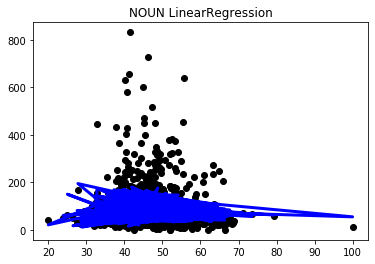

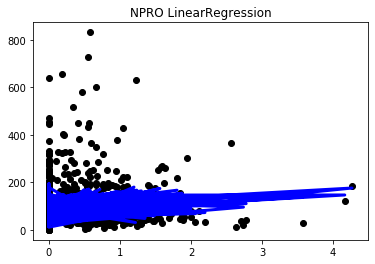

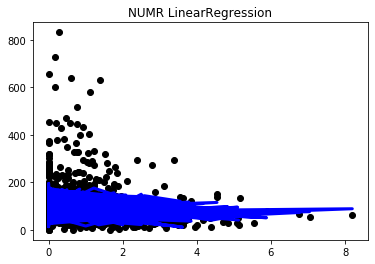

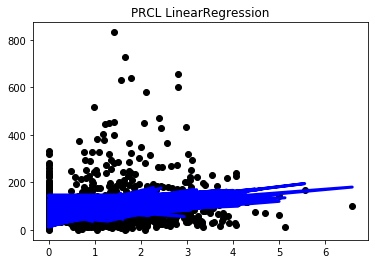

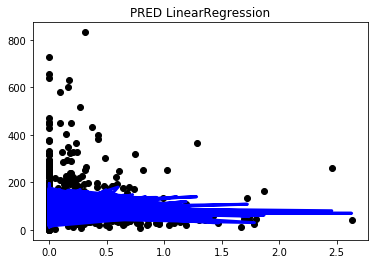

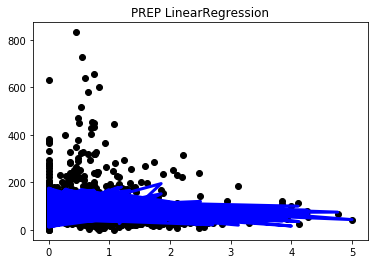

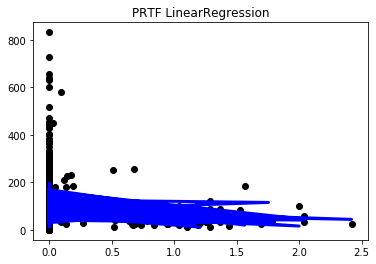

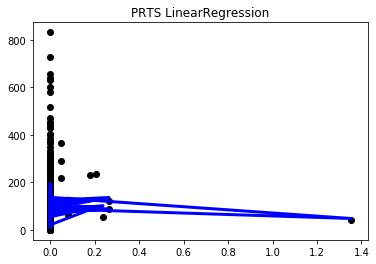

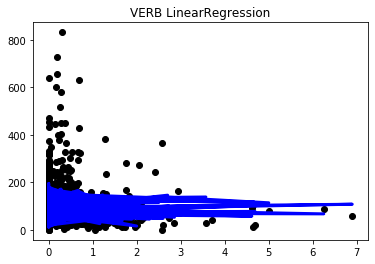

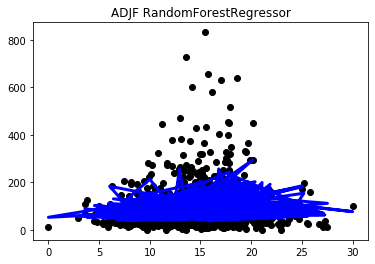

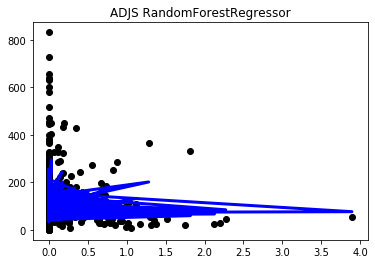

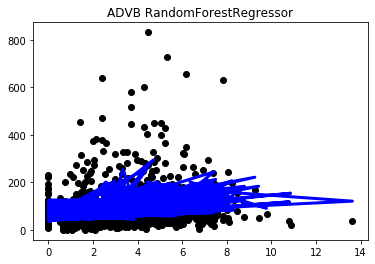

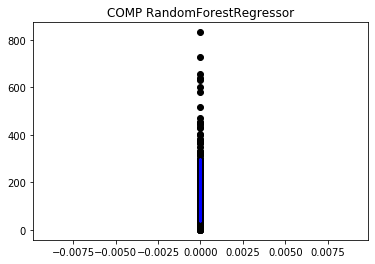

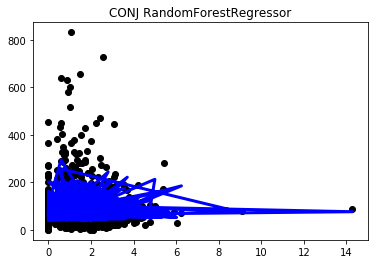

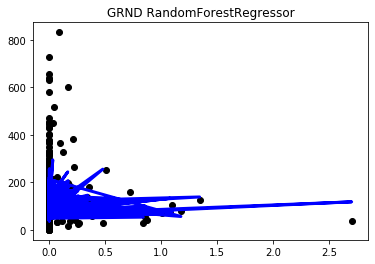

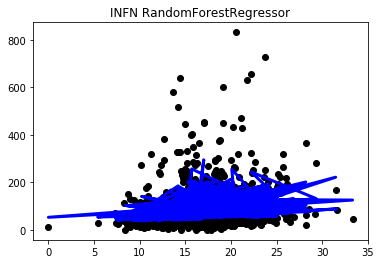

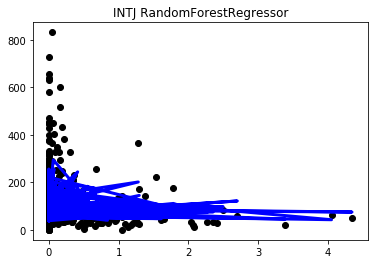

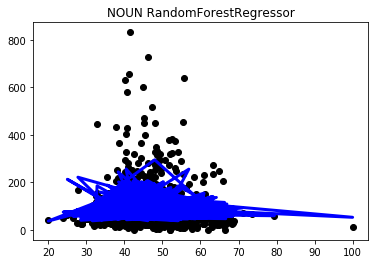

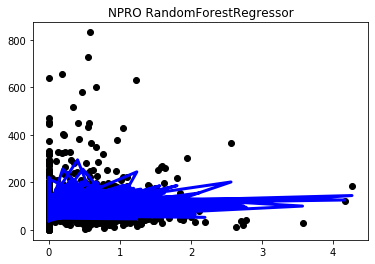

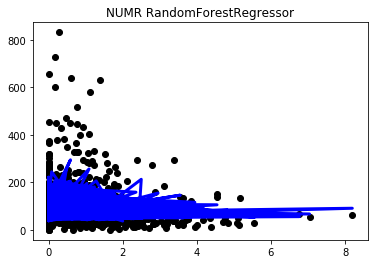

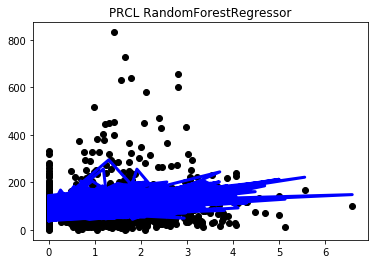

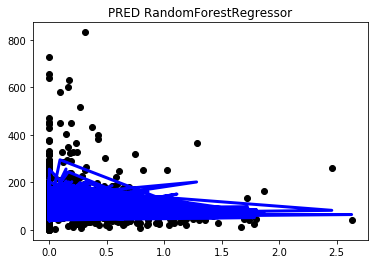

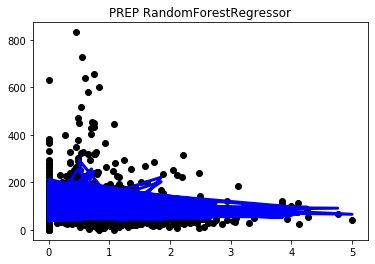

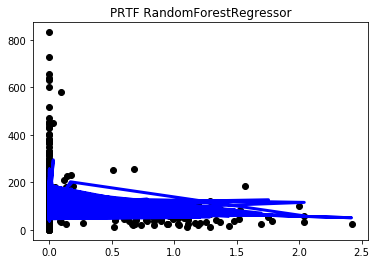

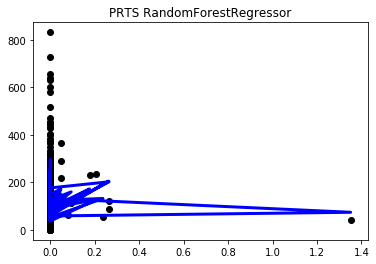

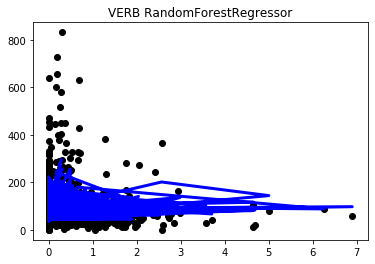

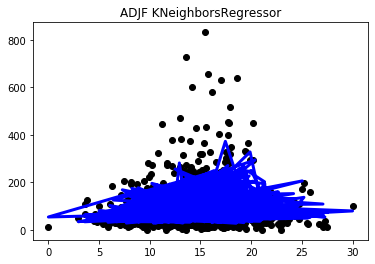

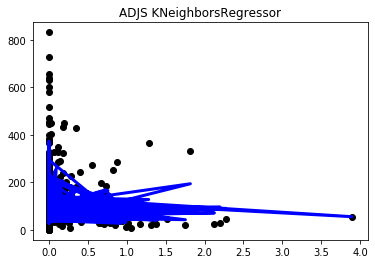

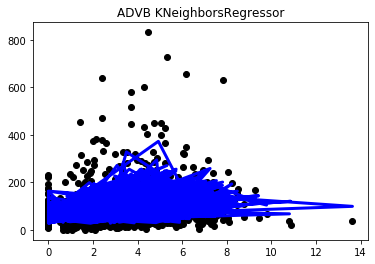

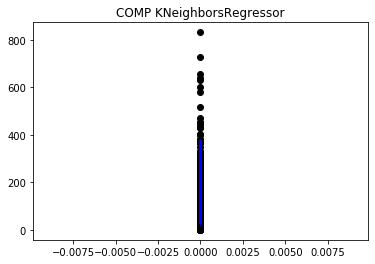

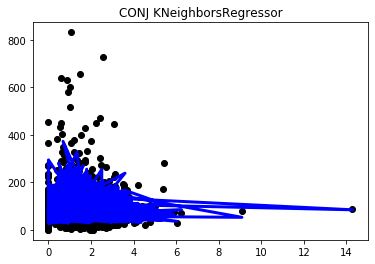

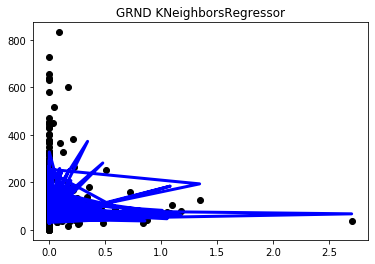

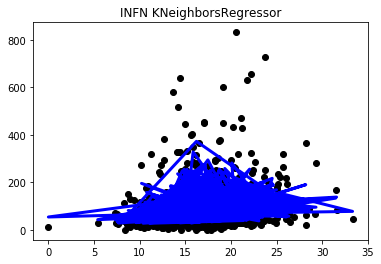

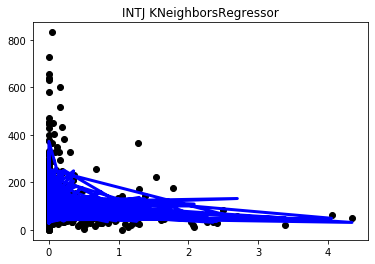

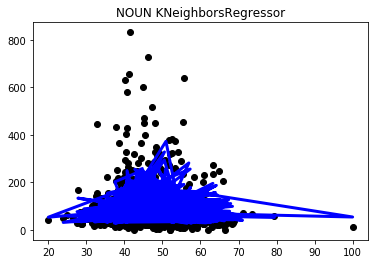

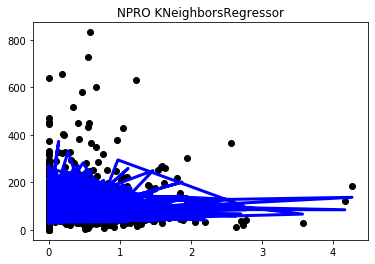

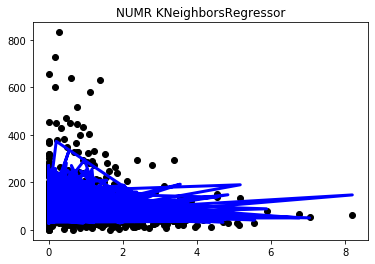

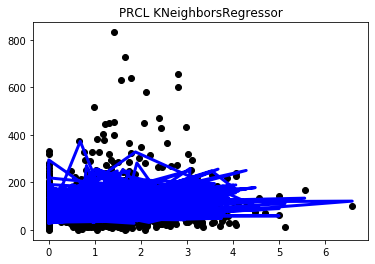

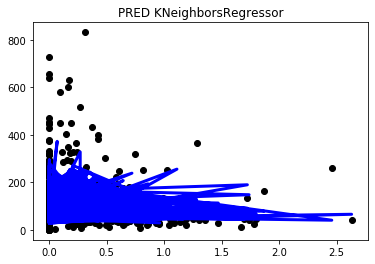

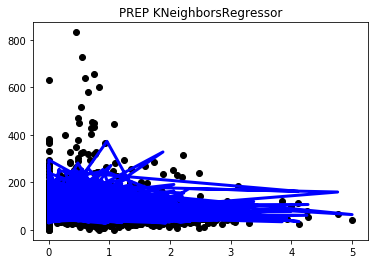

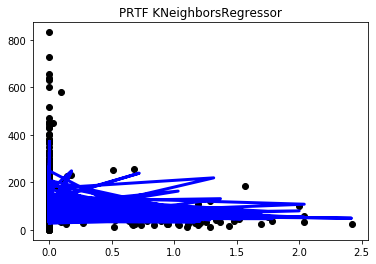

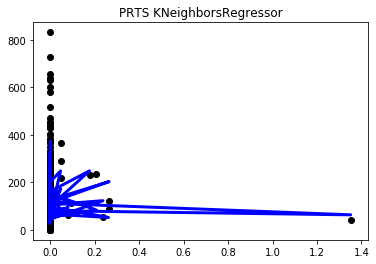

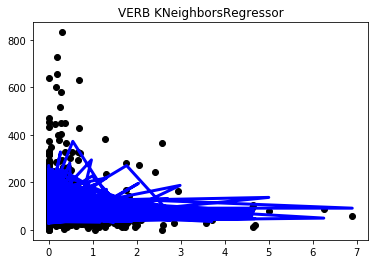

In [50]:



def reg_methods(models,data):
    result ={}
    X = data.drop(['likes'],axis=1)
    Y = data['likes']
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.4)
    for model in models:
        m = str(model)
        model.fit(x_train,y_train)        
        result[ m[:m.index('(')]] = model.score(x_test,y_test)
        y_pred = model.predict(x_test)
        for item in  x_test:            
            plt.scatter(x_test[item], y_test,  color='black', label = 'how it must be')
            plt.plot(x_test[item], y_pred, color='blue', linewidth=3, label = 'predicted')        
            plt.title(item+" "+m[:m.index('(')]) 
            plt.xlabel('x')
            plt.ylabel('y')
            plt.show()
    return result


models = [LinearRegression(),  # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features='sqrt'),  # случайный лес
          KNeighborsRegressor(n_neighbors=6),  # метод ближайших соседей
          ]
print(data_words.corr())
bla = reg_methods(models, data_words)
        